# Amr Abdelhamed Abdala G5

##  Gradient decent for optmizing linear regrssion

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score ,mean_absolute_error , mean_squared_error
import seaborn as sns
%matplotlib inline
np.random.seed(611)

#### Read RegData csv file into numpy array  (check your data
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
data = np.genfromtxt("RegData.csv",delimiter =",")
x1d = data[:,0:1]
y1d = data[:,1:2]
print(x1d.shape)
print(y1d.shape)

(13, 1)
(13, 1)


#### Explore your data


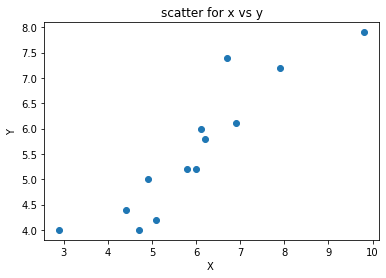

In [3]:
plt.scatter(x1d,y1d)
plt.xlabel("X ")
plt.ylabel("Y")
plt.title("scatter for x vs y")
plt.show()


* ### Feature vector X shape : (m,n) 
* ### Outcomes vector Y shape : (m,1) 
* ### $H(\theta)$ shape : (m,1) 
* ### So the shape of parameter vector $\theta$ : (1,n) 
* ### And shaoe of Gradients of each $\theta$ : (1,n)

## $$ h(\theta) = \theta_0 X_0 + \theta_1 X_1 + ... +\theta_n X_n $$

we can do same operation with matrix multiplication (dot product)

## $$ h(\theta) = X \theta_.T $$
#### check the shapes $$ (m,1) : (m,n) (n,1).T $$

## linear Regression Cost Function
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) $$


## Linear Regression Gradient

Correspondingly, the partial derivative of the cost function for regularized linear regression is defined as:

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right)  & \qquad \text{for } j \ge 1
\end{align}
$$

use dot product implementation :

$$ \frac{\partial J(\theta)}{\partial \theta_n}  = \frac{1}{m} ( h_\theta  - Y)  X  $$
#### check the shape $$ (1,n) : ((m,1)-(m,1)).T   (m,n) $$

In [4]:
class GradientDecent():
   
    
    def __init__(self,x,y,maxiter,learining_rate = .001,stop_at =10**-10,monitor = True,norm= True):
        """class constructor: initialize attributes and fit the model.
        Args:
            x (numpy array of numbers) : Feature matrix.
            y (numpy array of numbers) :  vector of outcome of each feature.
            learining_rate (float , optional = 0.001) :
            stop_at (float , optional = 10**-10) : iterate to reduce the gerdiants to be below stop_at.
            monitor (boolean , optional =True) : True , print the value of (the loss and the gradints) for each iteration. 
                                                 False , will print value of (the loss and the gradints) for last iteration.  

        """
        self.x = np.array(x)
        self.y=  np.array(y)
        m = self.x.shape[0]
        n = self.x.shape[1]
        self.norm = norm
        self.xnorms = None
        self.ynorms = None
        self.stop_at = stop_at
        self.learining_rate = learining_rate
        self.theta = self.intilalizeTheta(n+1)
        self.historyLoss =pd.DataFrame(columns =["loss"])
        self.historyGradients =pd.DataFrame(columns =[f"G{i}" for i in range(n+1)])
        self.historyTheta =pd.DataFrame(columns = [f"Theta{i}" for i in range(n+1)])
        self.fitGD(self.x,self.y,maxiter,monitor)
        
        
    def intilalizeTheta(self,n):
        """Randomly intilalize Theta.

        Args:
            n (Intger): The lenght of theta vector

        Returns:
             (numpy array): vector with value of Theta
        """
        #return np.random.randint(1,9,size =(1,n))/10
        
        return np.zeros((1,n))
    
    def normalizex(self,x):
        """Normalize the feature vector and store the values of mean and standard deviation for normaliztion at perdiction.

        Args:
            x (numpy array) : the feature vector

        Returns:
            xnorm (numpy array) : Normlized version of feature vector
        """
        if self.norm:
            if self.xnorms == None:
                self.xnorms = {"mean": np.mean(x,0),"std":np.std(x,0)}
            xnorm = (x-self.xnorms['mean'])/ self.xnorms['std']
            return xnorm
        else:
            return x
    
    def normalizey(self,y):
        """Normalize the outcomes vector and store the values of mean and standard deviation
                    for denormaliztion to the perdictions.
        Args:
            y (numpy array) : the outcomes vector

        Returns:
            ynorm (numpy array) : Normlized version of outcomes vector
        """
        if self.norm:
            if self.ynorms == None:
                self.ynorms = {"mean": np.mean(y,0),"std":np.std(y,0)}

            ynorm = (y-self.ynorms['mean'])/ self.ynorms['std']
            return ynorm
        else:
            return y
    
    def addX1(self,x):
        """Add vector of ones to the feature vector to multiply with theta 0.

        Args:
            x (numpy array) : the feature vector

        Returns:
             (numpy array)
        """
        return np.append(np.ones((x.shape[0],1)), x,axis=1) 
    
    def lossmse(self,y,y_hat):
        """calculate error based on the Mean Square Error function.
        Args:
            y (numpy array): the outcomes vector
            y_hat (numpy array): the perdictions vector

        Returns:
            loss (float) 
        """
        m= y.shape[0]
        loss =np.sum((1/(2*m)) *( y_hat- y)**2)
        return loss

    def gradientsmse(self,y,y_hat,x):
        """calculate the gradints Mean Square Error function
        Args:
            y (numpy array): the outcomes vector
            y_hat (numpy array): the perdictions vector
            x (numpy array): the featurs vector
            theta (numpy array): the model parameters
        Returns:
            gradients (numpy array): value of gradients for each theta

        """
        m= y.shape[0]
        gradients = np.dot((y_hat - y).T,x)/m
        return gradients
    
    def toHistory(self,i,loss,gradients,theta):
        """cache the values of Loss ,Gradients and Theta for each ittration.
        Args:
            i (int): number of itteration
            loss (numpy.float) : error 
            gradients (numpy array): value of gradients for each theta
            theta (numpy array): the model parameters
        """
        self.historyLoss = self.historyLoss.append(pd.Series(loss,index = ['loss']).T,ignore_index=True)
        self.historyGradients = self.historyGradients.append(pd.Series(gradients[0], index=self.historyGradients.columns),
                                                             ignore_index=True)
        self.historyTheta = self.historyTheta.append(pd.Series(theta[0], index=self.historyTheta.columns),
                                                         ignore_index=True) 
        
    def monitor(self,idx,loss,gradients,theta):
        """print the values of Loss ,Gradients and Theta for each ittration.
        Args:
            idx (int) : number of itteration
            loss (int) : error 
            gradients (numpy array): value of gradients for each theta
            theta (numpy array): the model parameters
        """
        
        print(f"Iteration : {idx} , Loss = {loss} , Gradients = {gradients}")
        
    def fitGD(self,x,y,maxiter,monitor=True):
        """fit linear regrestion model.

        Args:
            x (numpy array of numbers) : Feature matrix.
            y (numpy array of numbers) :  vector of outcome of each feature.
            monitor (boolean , optional =True) : True , print the value of (the loss and the gradints) for each iteration. 
                                                 False , will print value of (the loss and the gradints) for last iteration.
        """
    
        #print(f"theta shape: {theta.shape}")
        #y_hat = np.dot(x,theta.T)
        #print(f"y pridicted shape: {y_hat.shape}")
        #loss = lossmse(y,y_hat)
        x = self.normalizex(x)
        y = self.normalizey(y)
        x = self.addX1(x)
        iteration = 1
        lossconter = 0
        thetaconter =0
        while True:
            y_hat = np.dot(x,self.theta.T)
            loss = np.round(self.lossmse(y,y_hat),4)
            grad = self.gradientsmse(y,y_hat,x)
            self.theta = self.theta - ((grad *self.learining_rate )/x.shape[0])
            #print(loss,type(loss))
            self.toHistory(iteration,loss,grad,self.theta)
            #---------------------
            if iteration > 3: 
                if(np.all(self.historyLoss.iloc[-1,:] == self.historyLoss.iloc[-2,:])):
                    lossconter  += 1
                if(np.all(self.historyTheta.iloc[-1,:] == self.historyTheta.iloc[-2,:]) ):
                    thetaconter += 1
            
            #-------------------
            if ( np.linalg.norm(grad) <= self.stop_at) or (iteration == maxiter) or (thetaconter == 50) or(lossconter ==50) :
                self.monitor(iteration,loss,grad,self.theta)
                break
                
            if (monitor):
                self.monitor(iteration,loss,grad,self.theta)
            iteration += 1
            
    def pridict(self,xp): 
        """make perdiction corresponding to provided values.
        Args:
            xp (numpy array of numbers) : Feature matrix to perdict values 

        Returns:
            prdictions: denormlized perdictions corresponding to xp values
        """
        xp = self.normalizex(xp)
        xp = self.addX1(xp)
        prdictions = np.dot(xp,self.theta.T)
        if self.norm:
            prdictions = (prdictions*self.ynorms['std']) + self.ynorms['mean']
        return prdictions
    
    def plotModel(self,nx= 0,xlabl = "Feature",ylabl= "outcomes",title = "Fitted model",show =True):
        """plot the out comes and the model on one plot.
        Args:
            nx (int ,optional) : number of columen Feature to plot on x axies 
            xlabl (string ,optinal): X axies label for the plot
            ylabl (string ,optinal): Y axies label for the plot
            title (string ,optinal): plot Title 
        show (boolean ,optional) : true to show the plot 
                                        false to enable use of sub plots

        """
        plt.scatter(self.x[:,nx:nx+1],self.y,c ="blue")
        plt.plot(self.x[:,nx:nx+1],self.pridict(self.x[:,nx:nx+1]) ,c ="red")
        plt.xlabel(xlabl)
        plt.ylabel(ylabl)
        plt.title(title)
        if show: plt.show()
        
    def plotLoss(self,show =True):
        """plot the loss for each itteration.
        
        """
        plt.plot(self.historyLoss.index+1,self.historyLoss ,c ="red")
        plt.xlabel("Itterations")
        plt.ylabel("Loss")
        plt.title("loss For each itteration")
        if show: plt.show()
    def plotThetaVItteration(self,n_theta =0,show =True):
        """plot theta for itteration.
        Args:   
            n_theta (int): number of theta to plot for itteration
            show (boolean ,optional) : true to show the plot 
                                        false to enable use of sub plots
        """
        plt.plot(self.historyTheta.index,self.historyTheta[f"Theta{n_theta}"])
        plt.xlabel("Itterations")
        plt.ylabel(f"Theta{n_theta}")
        plt.title(f"Theta{n_theta} For each itteration")
        if show: plt.show()
    def plotThetaVloss(self,n_theta =0 ,show =True):
        """plot theta and the loss for itteration.
        Args:   
            n_theta (int ,optional ): number of theta to plot for itteration 
            show (boolean ,optional) : true to show the plot 
                                        false to enable use of sub plots 
        """
        plt.plot(self.historyTheta[f"Theta{n_theta}"] ,self.historyLoss)
        plt.xlabel(f"Theta{n_theta}")
        plt.ylabel("Loss")
        plt.title(f"Theta{n_theta} to loss for each itteration")
        if show: plt.show()
        
    def evalute(self,xe,ye):
        """evalute the model to corresponding data.
        Args:
            xe (numpy array) :Feature matrix to perdict values  
            ye (numpy array) : outcomes (True value ) 
        """
        yhat = self.pridict(xe)
        evalution ={"r2" : r2_score(ye, yhat) ,
                    "Mean Absolute Error" :  mean_absolute_error(ye, yhat),
                    "Mean Squared Error" :  mean_squared_error(ye, yhat)}
        return evalution

In [5]:
G =GradientDecent(x1d,y1d,maxiter = 1000,learining_rate = .01,stop_at =10**-10,monitor=False,norm =False)

Iteration : 222 , Loss = 0.2006 , Gradients = [[-0.09523089 -0.02725578]]


In [6]:
G.theta

array([[0.15525523, 0.89336247]])

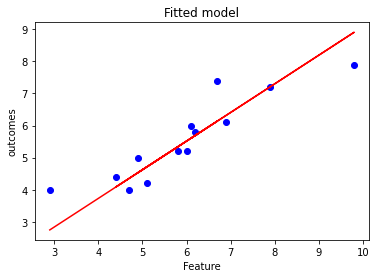

In [7]:
G.plotModel()

<Figure size 504x504 with 0 Axes>

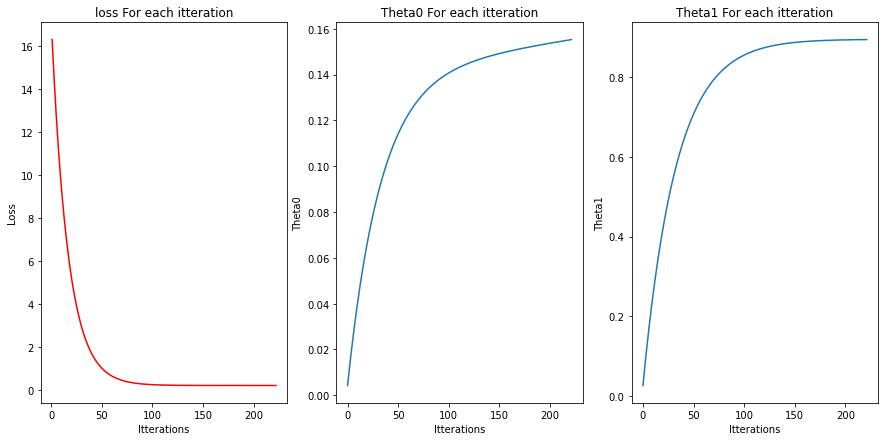

In [8]:
plt.figure(figsize = (7,7))
plt.subplots(nrows=1, ncols=3,figsize = (15,7))
plt.subplot(1, 3, 1)
G.plotLoss(False)
plt.subplot(1, 3, 2)
G.plotThetaVItteration(0,False)
plt.subplot(1, 3, 3)
G.plotThetaVItteration(1,False)
plt.show()

<Figure size 504x504 with 0 Axes>

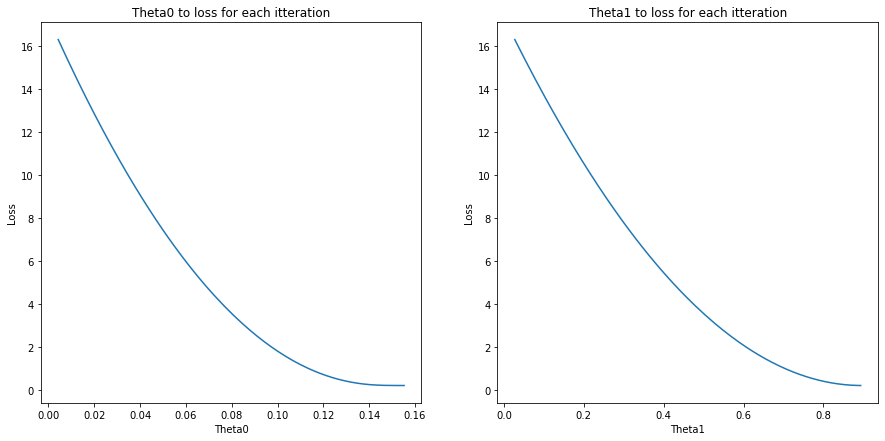

In [9]:
plt.figure(figsize = (7,7))
plt.subplots(nrows=1, ncols=2,figsize = (15,7))
plt.subplot(1, 2, 1)
G.plotThetaVloss(0,False)
plt.subplot(1, 2, 2)
G.plotThetaVloss(1,False)
plt.show()



In [11]:
print(G.evalute(x1d,y1d))

{'r2': 0.7483371813344215, 'Mean Absolute Error': 0.4888995260952853, 'Mean Squared Error': 0.4012607427939717}


## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [12]:
data = np.genfromtxt("MultipleLR.csv",delimiter =",")
x = data[:,0:-1]
y = data[:,-2:-1]
print(x.shape)
print(y.shape)

(25, 3)
(25, 1)


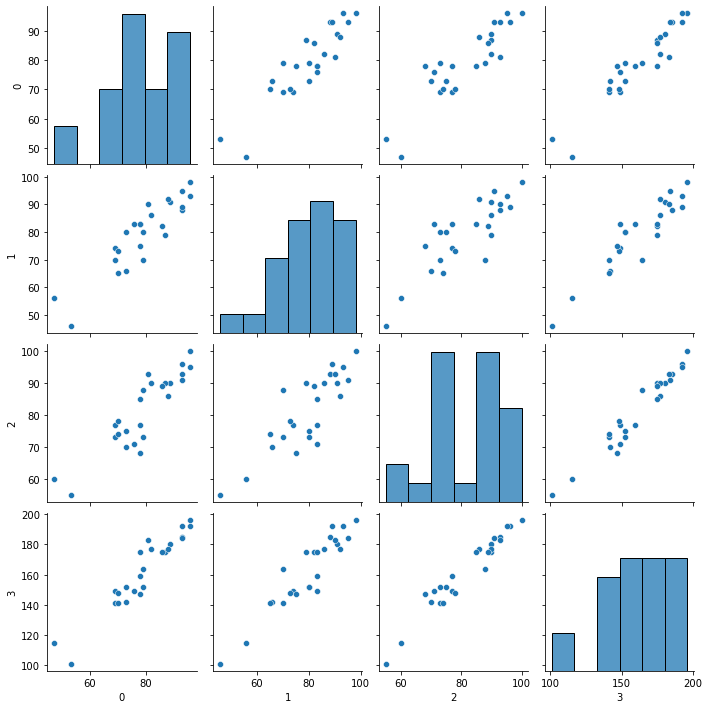

In [13]:
sns.pairplot(pd.DataFrame(data))
plt.show()


In [14]:
G =GradientDecent(x,y,maxiter = 1000,learining_rate = .3,stop_at =10**-10,monitor=False)

Iteration : 330 , Loss = 0.0152 , Gradients = [[ 1.99840144e-17  2.13767874e-02  3.13809466e-02 -5.33507369e-02]]


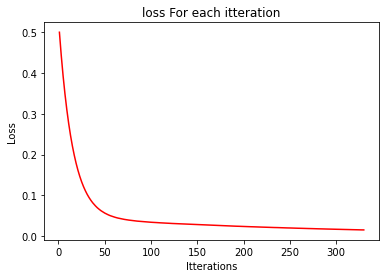

In [15]:
G.plotLoss()

In [16]:
G.evalute(x,y)

{'r2': 0.9697335306297361,
 'Mean Absolute Error': 1.64943105130849,
 'Mean Squared Error': 4.0220990080266255}

<Figure size 504x504 with 0 Axes>

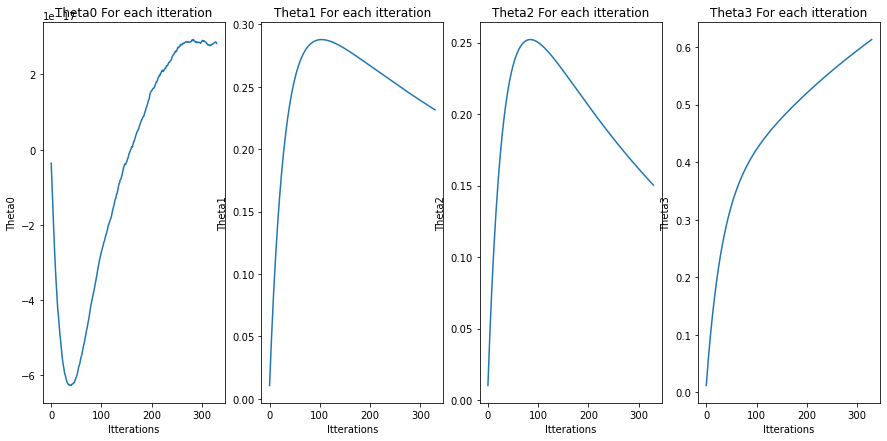

In [17]:
plt.figure(figsize = (7,7))
plt.subplots(nrows=1, ncols=G.theta.shape[1],figsize = (15,7))
for i in range(0,G.theta.shape[1]):
    plt.subplot(1, G.theta.shape[1], i+1)
    G.plotThetaVItteration(i,False)

plt.show()

<Figure size 504x504 with 0 Axes>

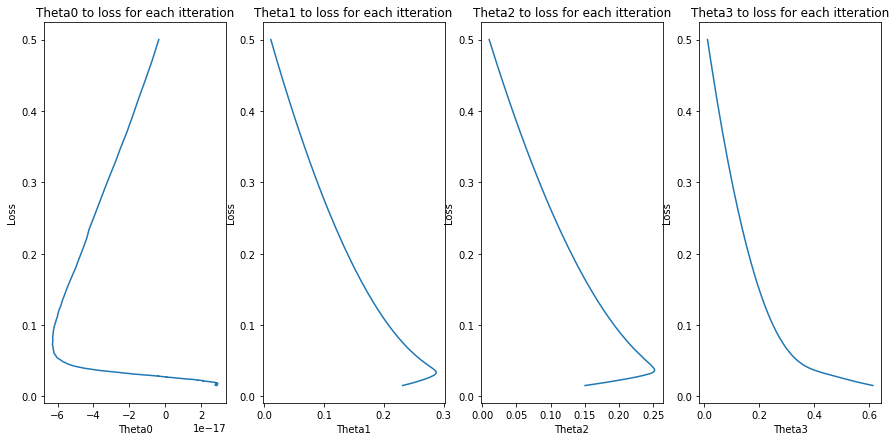

In [18]:
plt.figure(figsize = (7,7))
plt.subplots(nrows=1, ncols=G.theta.shape[1],figsize = (15,7))
for i in range(0,G.theta.shape[1]):
    plt.subplot(1, G.theta.shape[1], i+1)
    G.plotThetaVloss(i,False)

plt.show()